In [1]:
"""This program predicts corona virus infection by using machine learning model."""
#Importing necessary dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pandas'

In [2]:
#importing Csv file and store the data into dataFrame "df".
df=pd.read_csv("infected_countries.csv")
# print(df.head())

In [3]:
#Getting necessary inputs from the user
country_name=input("Enter Country Name:")
forecast_out=int(input("Enter no of days of forecast:"))
train_percent=float(input("Enter % of data you want to train:"))

Enter Country Name:US
Enter no of days of forecast:10
Enter % of data you want to train:90


In [4]:
#getting dataframe for the country
df1=df[[country_name]]
print(df1)
#create another column (the target for dependent variable) shifted "n" days up
df1["Prediction"]=df1[[country_name]].shift(-forecast_out)
#print new data set
# print(df1.tail())

        US
0        1
1        1
2        2
3        2
4        5
..     ...
61   43847
62   53740
63   65778
64   83836
65  101657

[66 rows x 1 columns]


<ipython-input-4-b1ef06703c43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Prediction"]=df1[[country_name]].shift(-forecast_out)


In [5]:
#create the independent data set (X) 
#convert data frame into numpyarray
X=np.array(df1.drop(["Prediction"],1))
#remove last "n" rows
X=X[:-forecast_out]
print(X)

[[   1]
 [   1]
 [   2]
 [   2]
 [   5]
 [   5]
 [   5]
 [   5]
 [   5]
 [   7]
 [   8]
 [   8]
 [  11]
 [  11]
 [  11]
 [  11]
 [  11]
 [  11]
 [  11]
 [  11]
 [  12]
 [  12]
 [  13]
 [  13]
 [  13]
 [  13]
 [  13]
 [  13]
 [  13]
 [  13]
 [  15]
 [  15]
 [  15]
 [  51]
 [  51]
 [  57]
 [  58]
 [  60]
 [  68]
 [  74]
 [  98]
 [ 118]
 [ 149]
 [ 217]
 [ 262]
 [ 402]
 [ 518]
 [ 583]
 [ 959]
 [1281]
 [1663]
 [2179]
 [2727]
 [3499]
 [4632]
 [6421]]


In [6]:
#create the dependent dataset (y)
#convert dataframe to an np array (all of the values including NaN's)
y=np.array(df1["Prediction"])
#Get all of the y values except the last "n" rows
y=y[:-forecast_out]
print(y)

[8.00000e+00 8.00000e+00 1.10000e+01 1.10000e+01 1.10000e+01 1.10000e+01
 1.10000e+01 1.10000e+01 1.10000e+01 1.10000e+01 1.20000e+01 1.20000e+01
 1.30000e+01 1.30000e+01 1.30000e+01 1.30000e+01 1.30000e+01 1.30000e+01
 1.30000e+01 1.30000e+01 1.50000e+01 1.50000e+01 1.50000e+01 5.10000e+01
 5.10000e+01 5.70000e+01 5.80000e+01 6.00000e+01 6.80000e+01 7.40000e+01
 9.80000e+01 1.18000e+02 1.49000e+02 2.17000e+02 2.62000e+02 4.02000e+02
 5.18000e+02 5.83000e+02 9.59000e+02 1.28100e+03 1.66300e+03 2.17900e+03
 2.72700e+03 3.49900e+03 4.63200e+03 6.42100e+03 7.78300e+03 1.36770e+04
 1.91000e+04 2.54890e+04 3.32760e+04 4.38470e+04 5.37400e+04 6.57780e+04
 8.38360e+04 1.01657e+05]


In [7]:
#split data into x% training and (100-x)% testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1-train_percent/100)

In [8]:
#create and train our model using support vector machine (Regressor)
svr_rbf=SVR(kernel="rbf",C=1e3,gamma=0.1)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
#testing model: score returns the cofficient of determination of R^2 of the prediction.
#The best possible score is 1.0
svm_confidence=svr_rbf.score(x_test,y_test)
print("svm confidence:",svm_confidence)

svm confidence: 0.38895034339744483


In [10]:
#create and train the Linear Regression Model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#testing model: score returns the cofficient of determination of R^2 of the prediction.
#best possible value is 1.
lr_confidence=lr.score(x_test,y_test)
print("lr confidence:",lr_confidence)

lr confidence: 0.9228587284054757


In [12]:
#set x_forecast equal to the last 30 rows of the original data set from the column
x_forecast=np.array(df1.drop(["Prediction"],1))[-forecast_out:]
print(x_forecast)

[[  7783]
 [ 13677]
 [ 19100]
 [ 25489]
 [ 33276]
 [ 43847]
 [ 53740]
 [ 65778]
 [ 83836]
 [101657]]


In [13]:
#print the linear regression model predictions for the next "n" days
lr_prediction=lr.predict(x_forecast)
print(lr_prediction)

[ 136113.71697695  238963.95124617  333595.24076806  445083.21951697
  580966.28267518  765430.11478579  938062.85445757 1148125.82020798
 1463237.71882244 1774213.97007997]


In [14]:
#print the support vector regression model predictions for the next "n" days
svm_prediction=svr_rbf.predict(x_forecast)
print(svm_prediction)

[2177.08371239 2177.08371239 2177.08371239 2177.08371239 2177.08371239
 2177.08371239 2177.08371239 2177.08371239 2177.08371239 2177.08371239]


In [15]:
#Appending predicted outcomes of linear regression model into original column
df_lronly=pd.DataFrame(lr_prediction,columns=[country_name])
df_lr=pd.concat([df1,df_lronly],ignore_index=True)
print(df_lr)

              US  Prediction
0   1.000000e+00         8.0
1   1.000000e+00         8.0
2   2.000000e+00        11.0
3   2.000000e+00        11.0
4   5.000000e+00        11.0
..           ...         ...
71  7.654301e+05         NaN
72  9.380629e+05         NaN
73  1.148126e+06         NaN
74  1.463238e+06         NaN
75  1.774214e+06         NaN

[76 rows x 2 columns]


In [16]:
#Appending predicted outcomes of vector regression model into original column
df_svmonly=pd.DataFrame(svm_prediction,columns=[country_name])
df_svm=pd.concat([df1,df_svmonly],ignore_index=True)
print(df_svm)

             US  Prediction
0      1.000000         8.0
1      1.000000         8.0
2      2.000000        11.0
3      2.000000        11.0
4      5.000000        11.0
..          ...         ...
71  2177.083712         NaN
72  2177.083712         NaN
73  2177.083712         NaN
74  2177.083712         NaN
75  2177.083712         NaN

[76 rows x 2 columns]


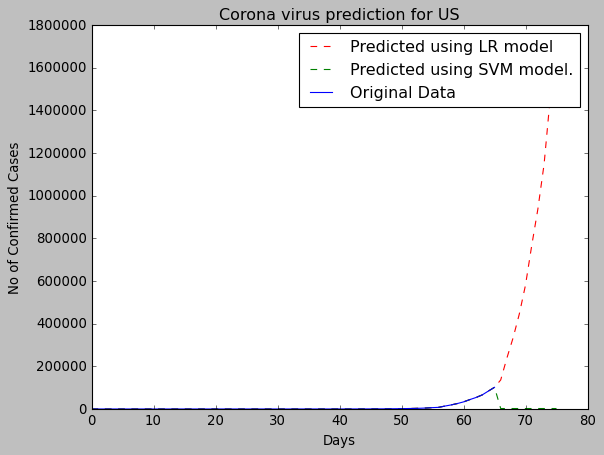

In [17]:
#plotting the data:
style.use("classic")
plt.plot(df_lr[country_name],"r--",label="Predicted using LR model")
plt.plot(df_svm[country_name],"g--",label="Predicted using SVM model.")
plt.plot(df1[country_name],label="Original Data")
plt.title(f"Corona virus prediction for {country_name}")
plt.xlabel("Days")
plt.ylabel("No of Confirmed Cases")
plt.legend()
plt.show()